In [1]:
#Importing needed modules.
from os import mkdir , listdir
from shutil import copyfile , rmtree
from random import sample
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt
#Instancing from 'ImageDataGenerator' object.
generator = ImageDataGenerator(rescale=1/255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               horizontal_flip=True,
                               zoom_range=0.2)

In [2]:
#Making train , valid and test directories.
def Make_paths(base_path,labels)->str :
    '''function docstring'''
    if 'ready_to_gen' in listdir(base_path) :
        rmtree(f'{base_path}\\ready_to_gen')
    mkdir(f'{base_path}\\ready_to_gen')
    mkdir(f'{base_path}\\ready_to_gen\\train')
    mkdir(f'{base_path}\\ready_to_gen\\valid')
    mkdir(f'{base_path}\\ready_to_gen\\test')
    for Class in labels :
        if Class == 'ready_to_gen' or Class == 'Caries_Gingivitus_ToothDiscoloration_Ulcer-yolo_annotated-Dataset' :
            continue
        mkdir(f'{base_path}\\ready_to_gen\\train\\{Class}')
        mkdir(f'{base_path}\\ready_to_gen\\valid\\{Class}')
        mkdir(f'{base_path}\\ready_to_gen\\test\\{Class}')
    return f'{base_path}\\ready_to_gen\\train' , f'{base_path}\\ready_to_gen\\valid' , f'{base_path}\\ready_to_gen\\test'
path = 'D:\\datasets\\Oral diseases'
train , valid , test =  Make_paths(path,listdir(path))

In [3]:
#Splitting dataset.
def split_data(photo_path,label_name,train_size)->None :
    '''function docstring'''
    size_tr = (train_size*len(listdir(photo_path)))//100
    train_select = sample(listdir(photo_path),size_tr)
    reamin_photos = [photo for photo in listdir(photo_path) if photo not in train_select]
    size_valid = len(reamin_photos)//2
    valid_select = sample(reamin_photos,size_valid)
    for pic in listdir(photo_path) :
        if pic in train_select :
            copyfile(f'{photo_path}\\{pic}',f'{train}\\{label_name}\\{pic}')
        elif pic in valid_select :
            copyfile(f'{photo_path}\\{pic}',f'{valid}\\{label_name}\\{pic}')
        else :
            copyfile(f'{photo_path}\\{pic}',f'{test}\\{label_name}\\{pic}')

lbl = [l for l in listdir(path) if l != 'ready_to_gen' and l != 'Caries_Gingivitus_ToothDiscoloration_Ulcer-yolo_annotated-Dataset']
Addresses = ["D:\\datasets\\Oral diseases\\Calculus\\Calculus",
            "D:\\datasets\\Oral diseases\\Data caries\\Data caries\\caries augmented data set\\preview",
            "D:\\datasets\\Oral diseases\\Gingivitis\\Gingivitis",
            "D:\\datasets\\Oral diseases\\hypodontia\\hypodontia",
            "D:\\datasets\\Oral diseases\\Mouth Ulcer\\Mouth Ulcer\\Mouth_Ulcer_augmented_DataSet\\preview",
            "D:\\datasets\\Oral diseases\\Tooth Discoloration\\Tooth Discoloration\\Tooth_discoloration_augmented_dataser\\preview"]
size = int(input('Enter train size :'))
for i in range(len(Addresses)) :
    split_data(Addresses[i],lbl[i],size)

Enter train size :90


In [4]:
#Generating datas.
target_size = (155,155)
ready_train = generator.flow_from_directory(train,target_size=target_size,batch_size=104)
ready_valid = generator.flow_from_directory(valid,target_size=target_size,batch_size=11)
ready_test = generator.flow_from_directory(test,target_size=target_size,batch_size=11)

Found 10484 images belonging to 6 classes.
Found 583 images belonging to 6 classes.
Found 586 images belonging to 6 classes.


In [6]:
#Creating a model by a function.
def Create_model(optm,Loss,acc)->None:
    '''function docstring'''
    pre = InceptionV3(include_top=False,input_shape=(155,155,3))
    for layer in pre.layers :
        layer.trainable = False
    last_l = pre.get_layer('mixed7')
    out = last_l.output
    x = layers.Flatten()(out)
    x = layers.Dense(12,activation='relu')(x)
    x = layers.Dense(6,activation='softmax')(x)
    model = Model(pre.input,x)
    model.compile(optimizer=optm,
                 loss=Loss,
                 metrics=[acc])
    return model

In [7]:
#Data train.
alg = Create_model(RMSprop(learning_rate=0.0001),'categorical_crossentropy','accuracy')
history = alg.fit(ready_train,epochs = 30,validation_data = ready_valid)

Epoch 1/30
101/101 [==============================] - 131s 1s/step - loss: 1.2039 - accuracy: 0.5299 - val_loss: 1.0101 - val_accuracy: 0.6106
Epoch 2/30
101/101 [==============================] - 85s 840ms/step - loss: 0.8878 - accuracy: 0.6683 - val_loss: 0.8069 - val_accuracy: 0.7050
Epoch 3/30
101/101 [==============================] - 85s 845ms/step - loss: 0.7646 - accuracy: 0.7153 - val_loss: 0.7528 - val_accuracy: 0.7256
Epoch 4/30
101/101 [==============================] - 84s 832ms/step - loss: 0.7044 - accuracy: 0.7366 - val_loss: 0.6933 - val_accuracy: 0.7290
Epoch 5/30
101/101 [==============================] - 85s 841ms/step - loss: 0.6549 - accuracy: 0.7495 - val_loss: 0.6181 - val_accuracy: 0.7564
Epoch 6/30
101/101 [==============================] - 85s 837ms/step - loss: 0.6204 - accuracy: 0.7651 - val_loss: 0.6278 - val_accuracy: 0.7616
Epoch 7/30
101/101 [==============================] - 85s 844ms/step - loss: 0.5832 - accuracy: 0.7744 - val_loss: 0.5746 - val_accu

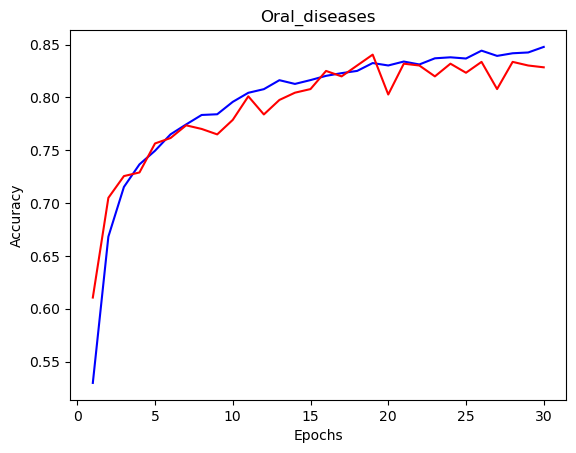

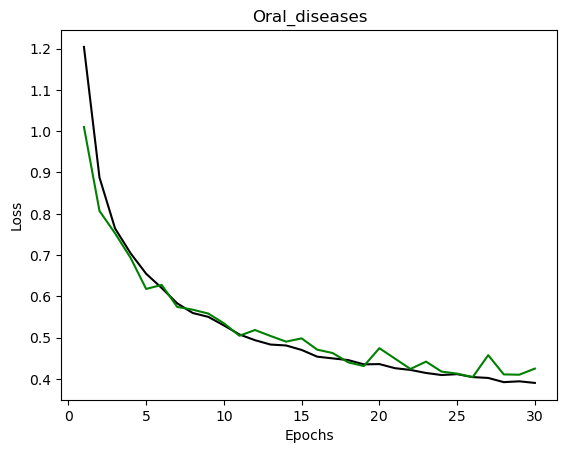

In [8]:
#Visualize models performance
epoch = range(1,len(history.epoch)+1)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Oral_diseases')
plt.show()
plt.plot(epoch,results['loss'],'black')
plt.plot(epoch,results['val_loss'],'green')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Oral_diseases')
plt.show()

In [9]:
#Evaluating datas on test set
alg.evaluate(ready_test)

54/54 [==============================] - 8s 148ms/step - loss: 0.4750 - accuracy: 0.8140


[0.47496145963668823, 0.8139931559562683]